In [1]:
import flir_image_extractor
from glob import glob
import matplotlib.pyplot as plt
import cv2 
import os 
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image

Using TensorFlow backend.
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/t

## 1. Video to Image
- 경로 별 동영상 MP4 파일을 이미지 jpg 파일로 나눠 동일 위치에 저장

In [ ]:
datapath="./resource"
proper_path=datapath+"/proper/"
im_half_path=datapath+"/improper_half/"
im_untight_path=datapath+"/improper_untight/"

for path in [proper_path,im_half_path,im_untight_path]:
    for videopath in glob(path+"*.MP4"):
        cam = cv2.VideoCapture(videopath) 
        currentframe=0
        while(True):
            ret,frame=cam.read()
            if ret:
                name="."+videopath.strip(".MP4")+"_"+str(currentframe)+'.jpg'
                print("Creating:"+name)
                cv2.imwrite(name,frame)
                currentframe+=1
            else:
                break
cam.release()
cv2.destroyAllWindows()

## 2. Flir Image Visualization

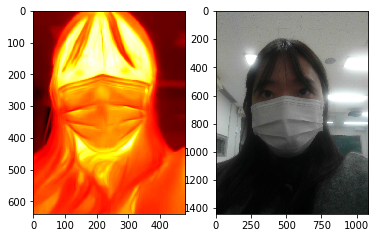

In [2]:
def plotFlirImage(path):
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    fir.plot()
plotFlirImage('./resource/proper/proper_02.JPG')

## 3. Face Detection

In [7]:
def get_np(path):
    path=os.path.normpath(path)
    fir = flir_image_extractor.FlirImageExtractor()
    fir.process_image(path)
    thermal_np=fir.get_thermal_np()
    rgb_np=fir.get_rgb_np()
    return thermal_np,rgb_np
thermal_np, rgb_np = get_np('./resource/proper/proper_02.JPG')    

In [10]:
def np_to_image(rgb_np,pathtosave='./test.jpg'):
    img = Image.fromarray(rgb_np, 'RGB')
    pathtosave=os.path.normpath(pathtosave)
    img.save(pathtosave)
    img.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()
np_to_image(rgb_np,"./test2.jpg")

In [14]:
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()


[{'confidence': 0.8187142014503479, 'box': [254, 351, 472, 594], 'keypoints': {'right_eye': (645, 550), 'nose': (545, 673), 'mouth_right': (636, 804), 'mouth_left': (438, 803), 'left_eye': (411, 560)}}]


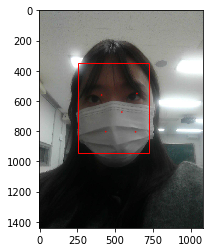

[{'box': [254, 351, 472, 594],
  'confidence': 0.8187142014503479,
  'keypoints': {'left_eye': (411, 560),
   'mouth_left': (438, 803),
   'mouth_right': (636, 804),
   'nose': (545, 673),
   'right_eye': (645, 550)}}]

In [13]:
def face_detection(filename):
    # load image from file
    pixels = plt.imread(filename)
    plt.show()
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    print(faces)
    # display faces on the original image
    draw_image_with_boxes(filename, faces)
    return faces
face_detection("./test2.jpg")